<h1>Bank Marketing Dataset (bank-additional-full)</h1>

<b>Topic</b>: Direct marketing campaigns of a bank to make clients subscribe a bank term deposit.<br>

DATASET: bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math 
import time
import seaborn as sns
import datetime

from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_scores
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [7]:
bankdf = pd.read_csv("bank-additional-full.csv", sep=";")
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1>FEATURE ENGINEERING</h1>

- Year: does it make sense to derive a year column to complete the date? Can be derived knowing that data are ordered. 
- Education: just one big basic class instead of all years?
- Duration: in minutes instead of seconds?


In [8]:
# CREATION OF YEAR VARIABLE

nemployed = bankdf['nr.employed']

unique, index = np.unique(nemployed, return_index=True) # [5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]

# 2008: 5191. , 5228.1, 5195.8
# 2009: 5176.3, 5099.1, 5076.2, 5017.5
# 2010: 5023.5, 5008.7, 4991.6, 4963.6

year_df = {'year':['2008','2008','2008','2009','2009','2009','2009','2010','2010','2010','2010'], 
           'nr.employed':[5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]}
year_df = pd.DataFrame.from_dict(year_df)

bankdf = bankdf.merge(year_df, on='nr.employed', how='left')

In [9]:
# Creating a function to convert the month abbrevuation in number

bankdf["month_name"] = bankdf["month"]

def convert_month(df):
    df['month'] = [int(datetime.datetime.strptime(obv, '%b').month) for obv in df['month_name']]
    df['year'] = [int(obv) for obv in df['year']]
convert_month(bankdf)




<h1>DESCRIPTION OF DATASET, CORRELATION MATRIX, PAIRPLOT and DESCRIPTION OF CATEGORICAL VARS</h1>

1) Describe() is used to provide descriptive statistics of the numerical variables in the dataset<br>
2) Correlation Heatmap: correlation of the numerical variables. Orange means positive correlation, Blue means negative correlation.<br>
3) PairPLot: scatterplots of the pairs of numerical variables, in the diagonal there is a KDE.<br>
4) Categorical Variables Description

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [10]:
#bankdf.info() # 41188  rows × 21 columns, 20 features and 1 target variable
bankdf.describe()  # statistics of numerical data

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,year
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.607896,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,2008.382102
std,10.42125,2.040998,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.586849
min,17.00000,3.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,2008.000000
25%,32.00000,5.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2008.000000
50%,38.00000,6.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2008.000000
75%,47.00000,8.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,2009.000000
max,98.00000,12.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,2010.000000


In [11]:
# Description of Categorical Variables
bankdf.describe(include=['object']) # categorical variables

,job,marital,education,default,housing,loan,contact,day_of_week,poutcome,y,month_name
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,5,3,2,10
top,admin.,married,university.degree,no,yes,no,cellular,thu,nonexistent,no,may
freq,10422,24928,12168,32588,21576,33950,26144,8623,35563,36548,13769


Text(0.5, 1.0, 'Correlation Heatmap')

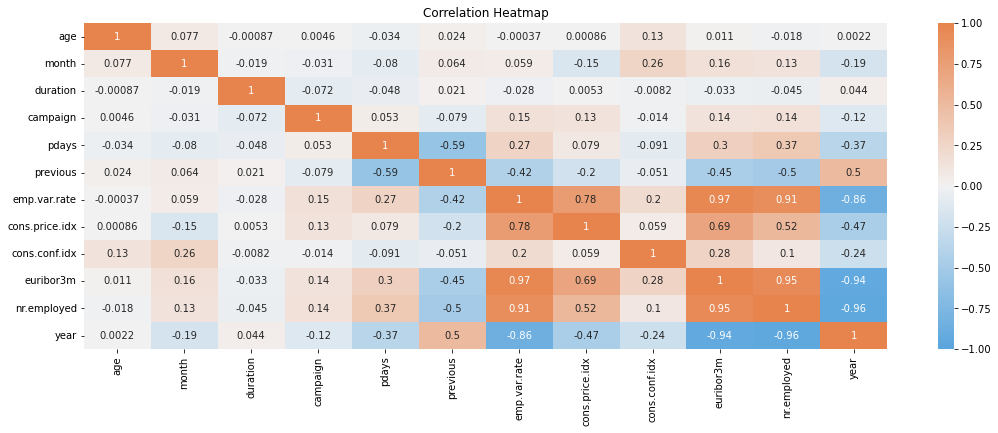

In [12]:
plt.figure(figsize=(18, 6))

pal2 = sns.diverging_palette(240, 30, l=65, as_cmap=True)

heatmap = sns.heatmap(bankdf.corr(), vmin=-1, vmax=1, annot=True,cmap=pal2)
heatmap.set_title('Correlation Heatmap')

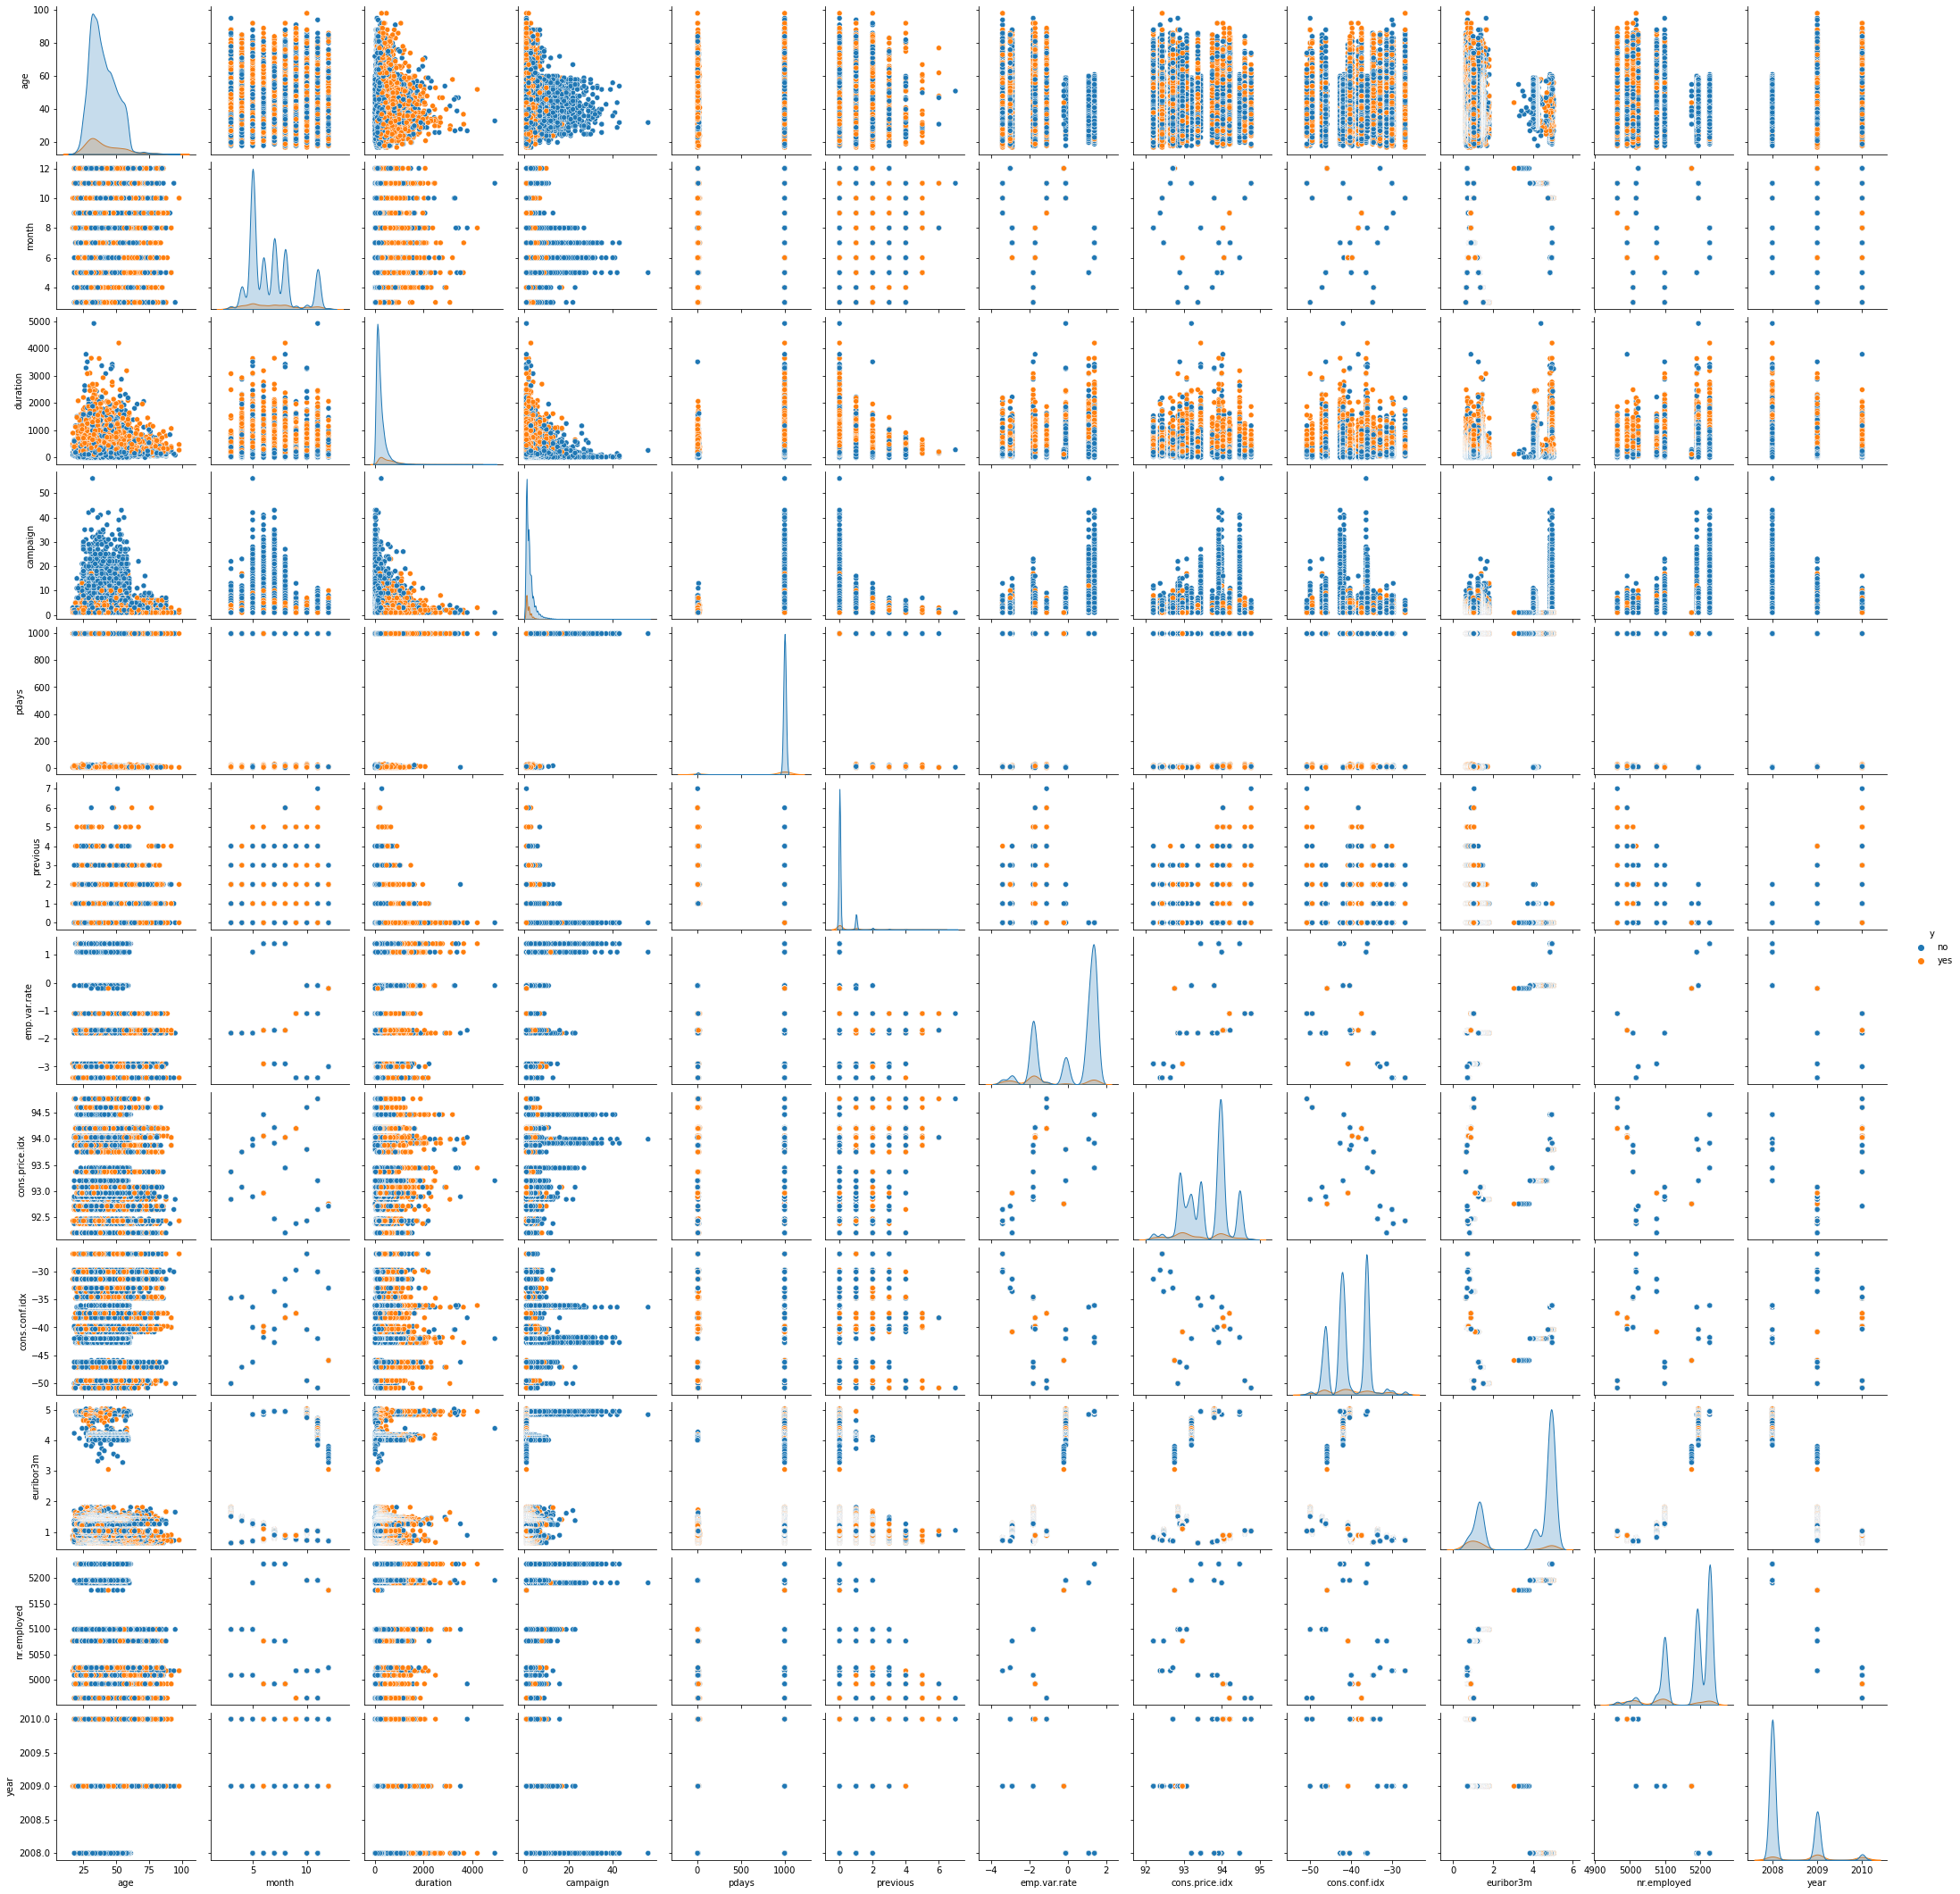

In [13]:
# ATTENTION TO THIS!!! TAKES A LOT OF TIME!!!

# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

sns.pairplot(bankdf, hue="y", diag_kind = 'kde')

<h1>VISUALIZATION: Numerical variables</h1>

<AxesSubplot:xlabel='Date'>

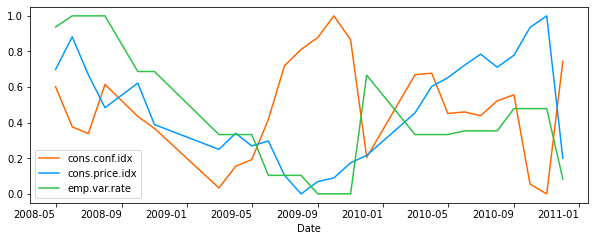

In [14]:
# FLUCTUATIONS OF 3 ECONOMIC FEATURES; STANDARDIZED
pal = [ "#ff6600", "#0099ff", "#2BC344"]
sns.set_palette(pal)

bankdf["day"] = int(1)
bankdf['date']=pd.to_datetime(bankdf[['year','month','day']])

scaler = preprocessing.MinMaxScaler()
dfp = pd.pivot_table(data=bankdf, index='date', values=["cons.price.idx", "emp.var.rate","cons.conf.idx"], 
                     aggfunc='first')

dfp[:] = scaler.fit_transform(dfp)

dfp.plot(figsize=(10, 4), ylabel='', xlabel='Date', rot=0) #with standardized data. looking at fluctuations over time



<AxesSubplot:xlabel='age', ylabel='Density'>

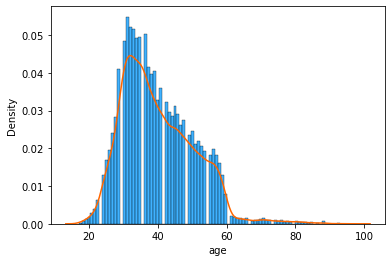

In [15]:
# Age

ax = sns.histplot(data=bankdf, x="age", kde=False, stat='density', color="#0099ff")
sns.kdeplot(data=bankdf, x="age", color="#ff6600", ax=ax)

<AxesSubplot:xlabel='duration', ylabel='Density'>

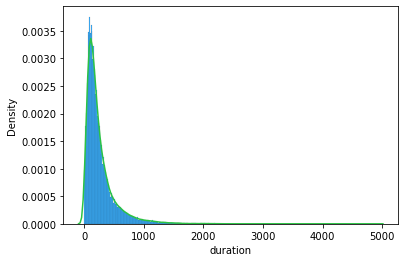

In [16]:
# Duration

ax = sns.histplot(bankdf["duration"], kde=False, stat='density', color="#0099ff")
sns.kdeplot(bankdf["duration"], color="#2BC344", ax=ax)

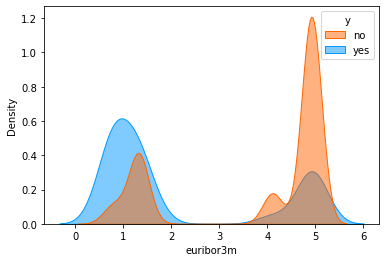

In [17]:
# Density plot with euribor3m and y outcome. Interesting.


sns.kdeplot(data=bankdf, x="euribor3m", hue="y", fill=True, common_norm=False, alpha=.5)
plt.show()

In [18]:
# VISUALIZATION: y and DURATION

sns.kdeplot(data=bankdf, x="duration", hue="y", fill=True, common_norm=False, palette=pal, alpha = 0.5)
plt.show()

ValueError: The palette list has the wrong number of colors.

<h1>VISUALIZATION: Categorical variables</h1>

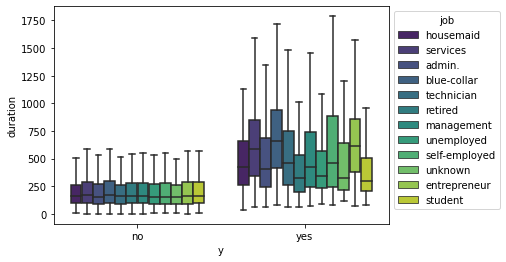

In [19]:
# Boxplot: duration, job and y

ax = sns.boxplot(data=bankdf, x="y", y="duration", hue="job", showfliers=False, palette = "viridis") # ATTENTION not showing outliers
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='marital', ylabel='age'>

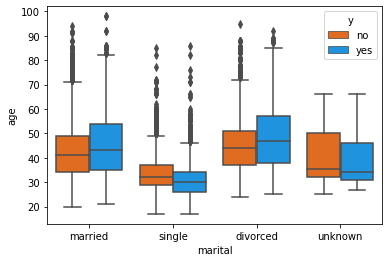

In [20]:
# Boxplot: marital status, age and outcome (y)
sns.boxplot(data=bankdf, x="marital", y="age", hue="y")

In [21]:
# Table of poutcome vs y

tab = pd.crosstab(index=bankdf["poutcome"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All","All"]

row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))


y,no,yes,All
poutcome,,,
failure,0.088545,0.014689,0.103234
nonexistent,0.787171,0.076260,0.863431
success,0.011630,0.021705,0.033335
All,0.887346,0.112654,1.000000


In [22]:
tab = pd.crosstab(index=bankdf["education"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab_per.index.get_level_values(0)

tab_per.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
education,,,
basic.4y,0.102550,0.092241,0.101389
basic.6y,0.057568,0.040517,0.055647
basic.9y,0.152457,0.101940,0.146766
high.school,0.232133,0.222198,0.231014
illiterate,0.000383,0.000862,0.000437
professional.course,0.127175,0.128233,0.127294
university.degree,0.287239,0.359914,0.295426
unknown,0.040495,0.054095,0.042027
All,1.000000,1.000000,1.000000


In [23]:
tab = pd.crosstab(index=bankdf["default"], 
                            columns=bankdf["y"], margins=True)

tab_per = tab/tab.loc["All",]


row = tab.index.get_level_values(0)

tab.style.background_gradient(
  subset = pd.IndexSlice[row[:-1], 'no'],
  cmap = sns.light_palette("#ff6600", as_cmap = True)).background_gradient(
  subset = pd.IndexSlice[row[:-1], 'yes'],
  cmap = sns.light_palette("#0099ff", as_cmap = True))

y,no,yes,All
default,,,
no,28391,4197,32588
unknown,8154,443,8597
yes,3,0,3
All,36548,4640,41188


In [24]:
hue_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
plt.figure(figsize=(14, 6))
sns.countplot(bankdf, x="year", hue="month_name", hue_order = hue_order, palette= "Paired")

C:\Users\MyName\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'month_name'

<Figure size 1008x432 with 0 Axes>

<h1>PRE-PROCESSING</h1>

- Missing Values: no missing values, but some categorical variables have a class called "Unknown". What should be do with it? How many observations having the Unknown class? <br>
- Scaling: is standardization/normalization required? <br>
- Dummy variables: <br>
- Remove duplicate rows <br>
- Feature Engineering: already performed some operations before<br>
- Remove Columns: pdays? does not make sense. Almost everyone was not contacted before. Can remove it. Already know if have been contacted from the poutcome (nonexistent is not contacted).<br>

<h3 style="color:green;">Unknowns Pre-Processing</h3>

In order to preserve interpretability and not lose too many observations, we have decided to remove the Unknowns for the following columns: job, marital, education, housing and loan. 
Furthermore, we decided to keep the Unknown class for the default variables.  

In [99]:
# Unknown count

#bankdf.nunique()
#bankdf.isnull().sum() # no NAs but there are some classes "Unknown", what should we do with them?

for column in bankdf.select_dtypes(include=object):
     print("\n" + column)
     print(bankdf[column].value_counts().to_markdown())
    
# job: 330 
# marital: 80
# education: 1731
# default: 8597
# housing 990
# loan: 990


job
|               |   job |
|:--------------|------:|
| admin.        | 10422 |
| blue-collar   |  9254 |
| technician    |  6743 |
| services      |  3969 |
| management    |  2924 |
| retired       |  1720 |
| entrepreneur  |  1456 |
| self-employed |  1421 |
| housemaid     |  1060 |
| unemployed    |  1014 |
| student       |   875 |
| unknown       |   330 |

marital
|          |   marital |
|:---------|----------:|
| married  |     24928 |
| single   |     11568 |
| divorced |      4612 |
| unknown  |        80 |

education
|                     |   education |
|:--------------------|------------:|
| university.degree   |       12168 |
| high.school         |        9515 |
| basic.9y            |        6045 |
| professional.course |        5243 |
| basic.4y            |        4176 |
| basic.6y            |        2292 |
| unknown             |        1731 |
| illiterate          |          18 |

default
|         |   default |
|:--------|----------:|
| no      |     32588 |


In [100]:
# Dealing with Unknowns: 


bankdf = bankdf[(bankdf['job'] != "unknown") & (bankdf['marital'] != "unknown") & (bankdf['education'] != "unknown")
                 & (bankdf['housing'] != "unknown") & (bankdf['loan'] != "unknown")]


In [101]:
# Dropping the Default variable.... only 3 observations in the "yes" class and too many unknowns. 

bankdf = bankdf.drop(['default'], axis=1)

<h3 style="color:green;">Correlation Pre-Processing</h3>

The social and economic variables are highly-correlated, especially considering emp.var.rate which has some correlations with the other economic variables close to 1.
#We have considered two different approached that could work in this case: (1) dimensionality reduction (for example PCA);(2) dropping the emp.var.rate variable. 

We have decided to go with the second option, since a dimensionality reduction would have been extremely complicated to interpret in the model's results. 

Furthermore, the same problem concerns the two features called: pdays and previous, containing almost the same kind of  information. Additionally, the pdays variable has many values to 999 (indicating no previous calls, that could lead to tricky results in the analysis. Thus, we are dropping the pdays. 

Last, we are dropping year because correlation is too high with the economic and social features (was created starting from those)

In [102]:
# High Correlation:

bankdf = bankdf.drop(['emp.var.rate', 'pdays', 'month_name', 'date', 'day', 'year'], axis=1)

In [103]:
# Remove duplicates: from 38245 to 38232

bankdf = bankdf.drop_duplicates()
len(bankdf)

38232

<h3 style="color:green;">Fairness Pre-Processing (AGE)</h3>

Based on the following paper:
Max Hort and Federica Sarro. 2022. "Privileged and Unprivileged Groups: An Empirical Study on the Impact of the Age Attribute on Fairness." In International Workshop on Equitable Data and Technology (FairWare ’22 ), May 9, 2022, Pittsburgh, PA, USA. ACM, New York, NY, USA, 8 pages.
https://doi.org/10.1145/3524491.3527308

Age threshold used: 47, which minimizes the mean difference (-0.05) between the Young and Old sensitive groups. Metric used is the Demographic Parity Difference. 

In [104]:
# Pre-Processing Fairness. Why is AGE so important in the classification models? Look at feature importance of RF and XGboost, 
# Age is at the very top even if there is no rationale for it to be so high... Could be a sign of unfairness?

# 0 if < 47 (Young), 1  if >=47 (Old)
bankdf['YoungOld'] = np.where(bankdf['age'] < 47, 0, 1)
bankdf['YoungOld']

0        1
1        1
2        0
3        0
4        1
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: YoungOld, Length: 38232, dtype: int32

<h3 style="color:green;">Target encoding and Dummy variables</h3>

In [105]:
# 1 if yes, otherwise 0
bankdf['y'] = np.where(bankdf['y']=='yes', 1, 0)

In [106]:
# Create Dummy Variables

bank_dummies = pd.get_dummies(bankdf.drop(['age'], axis=1), drop_first = True)
bank_dummies.columns 

Index(['month', 'duration', 'campaign', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'YoungOld',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

<h1>CLASSIFICATION</h1>

Start with: 
- Logistic Regression
- Classification Trees
- KNN

How to improve decision trees (reduce overfitting):
- Random Forests (# features: rule of thumb is max_features=sqrt(n_features))
- XGBoost (learning rate,#trees, max-depth)
- Pruning (both pre and post pruning): max depth, max # leaves, min # points in each node) ->  GRID SEARCH

How to improve logistic regression:
- Lasso regularization
- Ridge regularization
- Discussion about alpha for regularization methods.
- What about changing the threshold? Do we have a preference for FP over FN?

How to improve KNN: 
- think about distance metric used
- k (discuss variance-bias trade-off and decision boundaries meaning)

Feature importance and selection can be done with: 
- Lasso
- Random Forests

In [107]:
# Dataset split into test, validation and training set: 20% or 30 test set? Need validation if use CV?

X = bank_dummies.drop('y', axis=1)
y = bank_dummies["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8) # train and validation

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_test","X_val", X_val.shape, "y_val", 
      y_val.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (24468, 36) y_train (24468,) X_test X_val (6117, 36) y_val (6117,) X_test (7647, 36) y_test (7647,)


In [108]:
# Standardize with .StandardScaler()

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_val_standardized = scaler.transform(X_val)
X_test_standardized = scaler.transform(X_test)


<h2 style="color:red;">Logistic Regression</h2>

<h3 style="color:green;">L2 penalty (default, ridge)</h3>

In [109]:
# Logistic Regression, using l2 penalty (Ridge, default)

model_logit = LogisticRegression(random_state = 42, solver = 'liblinear') 
model_logit.fit(X_train_standardized,y_train)

# print score

print("The score of the training set is: ", model_logit.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", model_logit.score(X_val_standardized,y_val)) 

The score of the training set is:  0.9117214320745464
The score of the validation set is:  0.9112309955860716


In [110]:
#print coefficient
coefficient = model_logit.coef_
coefficient

array([[-0.05624731,  1.17610069, -0.10914178,  0.0294318 ,  0.15878298,
         0.24117667, -0.48950708, -0.58444193,  0.04346678, -0.14551236,
        -0.03114234, -0.02254356, -0.03358573,  0.05277532,  0.00655927,
        -0.09180042,  0.04665457, -0.01227457,  0.03923288, -0.02758476,
         0.052685  ,  0.01042387, -0.02492442,  0.02144498,  0.02015959,
         0.03301945,  0.10907874, -0.0040257 , -0.04112182, -0.32298553,
        -0.04467915,  0.02990835,  0.0051687 ,  0.02829581,  0.18389257,
         0.30217874]])

In [111]:
# odds
odds = np.exp(coefficient)
odds

array([[0.94530533, 3.2417091 , 0.89660329, 1.02986919, 1.17208355,
        1.27274588, 0.61292845, 0.55741685, 1.0444253 , 0.8645792 ,
        0.96933759, 0.97770865, 0.96697201, 1.05419277, 1.00658083,
        0.9122872 , 1.04776002, 0.98780046, 1.04001265, 0.97279222,
        1.05409755, 1.01047839, 0.97538363, 1.02167658, 1.02036417,
        1.03357064, 1.11525016, 0.99598239, 0.95971222, 0.72398433,
        0.95630427, 1.0303601 , 1.00518208, 1.02869994, 1.2018867 ,
        1.352803  ]])

<h4 style="color:red;">Interpretation of C in Logistic Regression</h4>

The C parameter in logistic regression controls the inverse of the regularization strength.
This means a smaller value of C specifies stronger regularization, and a larger value specifies weaker regularization. So 0.2 is strong (smaller coefficients), 0.8 is weak.

In [112]:
# Tuning alpha/lambda and choice between Ridge and Lasso regularizaion

# CAN DO THE SAME WITH LASSO PENALTY

# define grid
lr_grid = {
    'penalty': ["l1", "l2"],
    'C':  np.arange(0.1, 1.1, 0.1)
}

# Set up GridSearchCV 
grid_search = GridSearchCV(model_logit, lr_grid, cv=5, n_jobs=-1)

In [113]:
# Fit the grid search 
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best regularization: {best}")
# Best regularization:  {'C': 0.2, 'penalty': 'l1'} -> LASSO WITH ALPHA 0.2

Accuracy score for {'C': 0.1, 'penalty': 'l1'}: 0.9112717925769205
Accuracy score for {'C': 0.1, 'penalty': 'l2'}: 0.9111083271090006
Accuracy score for {'C': 0.2, 'penalty': 'l1'}: 0.9113126672959069
Accuracy score for {'C': 0.2, 'penalty': 'l2'}: 0.9111900765469733
Accuracy score for {'C': 0.30000000000000004, 'penalty': 'l1'}: 0.9112309345619469
Accuracy score for {'C': 0.30000000000000004, 'penalty': 'l2'}: 0.9112309429139532
Accuracy score for {'C': 0.4, 'penalty': 'l1'}: 0.9111900765469733
Accuracy score for {'C': 0.4, 'penalty': 'l2'}: 0.911149201827987
Accuracy score for {'C': 0.5, 'penalty': 'l1'}: 0.9112718092809333
Accuracy score for {'C': 0.5, 'penalty': 'l2'}: 0.9111900681949668
Accuracy score for {'C': 0.6, 'penalty': 'l1'}: 0.9112309429139532
Accuracy score for {'C': 0.6, 'penalty': 'l2'}: 0.9112309429139532
Accuracy score for {'C': 0.7000000000000001, 'penalty': 'l1'}: 0.9112309429139532
Accuracy score for {'C': 0.7000000000000001, 'penalty': 'l2'}: 0.9111900681949668
A

In [114]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_lr_model.score(X_train_standardized, y_train)}")
print(f"Validation Accuracy with best model: {best_lr_model.score(X_val_standardized, y_val)}")

Validation Accuracy with best model: 0.911476213830309
Validation Accuracy with best model: 0.9113944744155632


In [115]:
coefficient = best_lr_model.coef_

coeff = pd.DataFrame(coefficient)
columns = X_train.columns
coeff.columns = columns
coeff = coeff.transpose(copy=False)
coeff


,0
month,-0.057083
duration,1.171040
campaign,-0.100059
previous,0.020586
cons.price.idx,0.113010
cons.conf.idx,0.219431
euribor3m,-0.366066
nr.employed,-0.675589
YoungOld,0.037022
job_blue-collar,-0.143998


<h2 style="color:red;">KNN</h2>

In [116]:
# KNN

kn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2) # p is the power parameter for the Minkowski metric (2 Euclidean) 
kn.fit(X_train_standardized,y_train)

print("The score of the training set is: ", kn.score(X_train_standardized,y_train))
print("The score of the validation set is: ", kn.score(X_val_standardized,y_val)) 

The score of the training set is:  0.920835376818702
The score of the validation set is:  0.8942291973189472


<h3 style="color:green;">How many k? Distance metric? Grid Search</h3>

In [117]:
# The rule of thumb is sqrt(n)
k = math.ceil(math.sqrt(X_train_standardized.shape[0])) # odd number

In [119]:
## takes a lot A LOT of time 

n_neighbors = np.arange(1, k, 2)
accuracy_train =  []
accuracy_val = []

for k in n_neighbors:
    kn_tuning = KNeighborsClassifier(n_neighbors=k) # with Euclidean Distance
    kn_tuning.fit(X_train_standardized,y_train)
    
    accuracy_train.append(kn_tuning.score(X_train_standardized,y_train))
    accuracy_val.append(kn_tuning.score(X_val_standardized,y_val))


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (62,) and (38,)

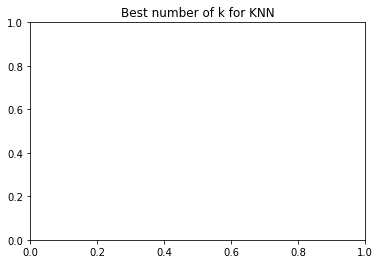

In [120]:
plt.title('Best number of k for KNN')
plt.plot(n_neighbors, accuracy_train, label = 'Train')
plt.plot(n_neighbors, accuracy_val, label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

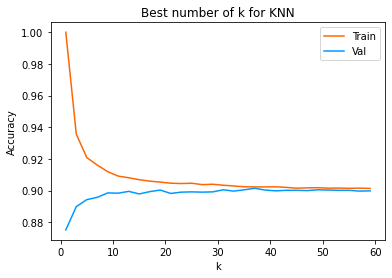

In [122]:
# zoom in

plt.title('Best number of k for KNN')
plt.plot(n_neighbors[0:30], accuracy_train[0:30], label = 'Train')
plt.plot(n_neighbors[0:30], accuracy_val[0:30], label = 'Val')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# maybe 15 or 25?

In [123]:
d = {'k': n_neighbors[3:30], 'train': accuracy_train[3:30],  'val': accuracy_val[3:30]}
results_df = pd.DataFrame(d)

results_df["diff"] = results_df["train"] - results_df["val"]
results_df

,k,train,val,diff
0,7,0.916054,0.895701,0.020353
1,9,0.911885,0.898480,0.013405
2,11,0.909106,0.898316,0.010790
3,13,0.908043,0.899461,0.008583
4,15,0.906817,0.897826,0.008991
5,17,0.905918,0.899297,0.006621
6,19,0.905305,0.900278,0.005027
7,21,0.904610,0.898153,0.006457
8,23,0.904406,0.898970,0.005436
9,25,0.904610,0.899134,0.005477


In [124]:
# Grid Search for both k and distance (p)

kn_grid = {
    'n_neighbors': np.array([15, 25, 33, 37, 41, 45]),
    'p': np.arange(1, 3) # 1 being Manhattan and 2 being Euclidean
}

In [125]:
# Set up GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(), kn_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_standardized, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")


KeyboardInterrupt: 

In [126]:
# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best_param
best_knn_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of KNN hyperparameters: {best_param}")

# Best combination of KNN hyperparameters: {'n_neighbors': 33, 'p': 2}

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [127]:
best_knn_model.fit(X_train_standardized,y_train)

print("The score of the training set is: ", best_knn_model.score(X_train_standardized,y_train)) 
print("The score of the validation set is: ", best_knn_model.score(X_val_standardized,y_val)) 

NameError: name 'best_knn_model' is not defined

<h2 style="color:red;">Classification Trees</h2>

In [128]:
# Classification Trees

dtree = tree.DecisionTreeClassifier(random_state = 42) 
dtree.fit(X_train_standardized, y_train) 
print("The score of the training set is: ", dtree.score(X_train_standardized, y_train)) # 1.....OVERFITTING
print("The score of the validation set is: ", dtree.score(X_val_standardized, y_val))


The score of the training set is:  1.0
The score of the validation set is:  0.8788621873467386


<h3 style="color:green;">Pre-Pruning: max_depth, min_samples_leaf and min_samples_split</h3>

In [129]:
# Pruning: max_depth, min_samples_leaf and min_samples_split

y_axis = []
for max_d in range(1,21):
    dtree = tree.DecisionTreeClassifier(max_depth=max_d, random_state=42)
    dtree.fit(X_train_standardized, y_train)
    y_axis.append(dtree.score(X_train_standardized, y_train))
    print('The Training Accuracy for max_depth {} is:'.format(max_d), dtree.score(X_train_standardized, y_train))


The Training Accuracy for max_depth 1 is: 0.889651790093183
The Training Accuracy for max_depth 2 is: 0.9056727153833578
The Training Accuracy for max_depth 3 is: 0.9109857773418343
The Training Accuracy for max_depth 4 is: 0.9152362269086153
The Training Accuracy for max_depth 5 is: 0.9169936243256498
The Training Accuracy for max_depth 6 is: 0.9203858100376001
The Training Accuracy for max_depth 7 is: 0.9237371260421775
The Training Accuracy for max_depth 8 is: 0.9281919241458231
The Training Accuracy for max_depth 9 is: 0.9345675984959948
The Training Accuracy for max_depth 10 is: 0.9421284943599804
The Training Accuracy for max_depth 11 is: 0.9506702632009155
The Training Accuracy for max_depth 12 is: 0.9589668137976132
The Training Accuracy for max_depth 13 is: 0.9670998855648194
The Training Accuracy for max_depth 14 is: 0.9742929540624489
The Training Accuracy for max_depth 15 is: 0.9803825404610103
The Training Accuracy for max_depth 16 is: 0.985164296223639
The Training Accura

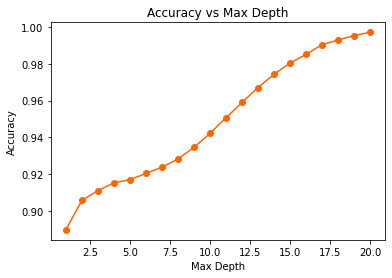

In [130]:
x_axis = range(1,21,1)
y_axis

plt.plot(x_axis, y_axis, marker = 'o')
plt.title("Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
tree_grid = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21,2).tolist(),
              'min_samples_split':np.arange(2,11,2).tolist(),
              'max_leaf_nodes':np.arange(3,26).tolist()}

# create an instance of the grid search object
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid, cv=5, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train_standardized, y_train)
duration = time.time() - start_time
# 294.6703038215637 seconds

In [ ]:
# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_

# Retrieve the best hyperparameters
best_param = grid_search.best_params_
best__tunedtree_model = grid_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

# Best combination of hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 20, 'min_samples_split': 2}

In [ ]:
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20,
                                                    min_samples_split= 2, random_state = 42)

best__tunedtree_model.fit(X_train_standardized, y_train)

print("The score of the training set is: ", best__tunedtree_model.score(X_train_standardized,y_train))
print("The score of the validation set is: ", best__tunedtree_model.score(X_val_standardized,y_val)) 

In [ ]:
plt.figure(figsize=(32,8))
tree.plot_tree(best__tunedtree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h3 style="color:green;">Post-Pruning: ccp_alphas</h3>

In [ ]:
# Post-Pruning

# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

dtree = tree.DecisionTreeClassifier(random_state=42) 
path = dtree.cost_complexity_pruning_path(X_train_standardized, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

In [ ]:
clfs = [] #building the different decision trees for each ccp_alpha
for ccp_alpha in ccp_alphas:
    dtree = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtree.fit(X_train_standardized, y_train)
    clfs.append(dtree)

# Number of nodes in the last tree is: 1 

In [ ]:
train_scores =[]
val_scores =[]

for tree in clfs: 
    train_scores.append(tree.score(X_train_standardized, y_train))
    val_scores.append(tree.score(X_val_standardized, y_val))
    
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# zoom in of previous plot

#len(ccp_alphas)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas[710:-20], train_scores[710:-20],marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[710:-20], val_scores[710:-20], marker="o",label="val", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
d = {'ccp_alpha':ccp_alphas[710:-20], 'train': train_scores[710:-20],  'val': val_scores[710:-20]}
results_df = pd.DataFrame(d)
results_df

In [ ]:
# Best ccp_alpha: 0.000116
best_ccp_alpha = float(0.000116)
from sklearn import tree
best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)

best_posttree_model.fit(X_train_standardized, y_train) 
print("The score of the training set is: ", best_posttree_model.score(X_train_standardized, y_train))
print("The score of the validation set is: ", best_posttree_model.score(X_val_standardized, y_val))


In [ ]:
plt.figure(figsize=(80,30))
tree.plot_tree(best_posttree_model,
               feature_names=list(X_train.columns), 
               filled=True, 
               fontsize=10) 

<h2 style="color:red;">Ensamble Methods</h2>

<h3 style="color:green;">Random Forests</h3>

In [ ]:
# Random Forests
rf = RandomForestClassifier(random_state = 42) # everything default

rf.fit(X_train_standardized, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train_standardized, y_train))) # 1.... OVERFITTING!!!
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val_standardized, y_val)))

Parameters to tune: 

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [ ]:
# Tuning parameters: CHECK THE GRID.... IS IT REASONABLE??????

param_grid = {
    'max_depth': np.arange(10, 100, 10),
    'max_features': np.arange(2,30,2),
    'min_samples_leaf': np.arange(5,30,5),
    'min_samples_split': np.arange(2,20,2),
    'n_estimators': np.arange(10,400,10)
}

In [ ]:
# RANDOM SEARCH (not GRID... too computationally expensive with RF....)

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv=5, n_jobs=-1, random_state=42)

start_time = time.time()
random_search.fit(X_train_standardized, y_train)
duration = time.time() - start_time

In [ ]:
# Retrieve and print the scores for each iteration
cv_results = random_search.cv_results_

# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_rf_model = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best combination of hyperparameters: {best_param}")

#{'n_estimators': 230, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 14, 'max_depth': 90}

In [ ]:
best_rf_model.fit(X_train_standardized, y_train)

print("The score of the training set is: ", best_rf_model.score(X_train_standardized,y_train))
print("The score of the validation set is: ", best_rf_model.score(X_val_standardized,y_val)) 

In [ ]:
feature_importance = best_rf_model.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h3 style="color:green;">XGBoost</h3>

In [ ]:
# XGBoost
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, # everything default
                                    max_depth=3, random_state=42)


gboost.fit(X_train_standardized, y_train) 
print("The score of the training set is: ", gboost.score(X_train_standardized, y_train)) 
print("The score of the validation set is: ", gboost.score(X_val_standardized, y_val))

In [ ]:
# Tuning the Gradient Boosting parameters

# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

# BOOSTING PARAMETERS: learning_rate, n_estimators and subsample
# TREE SPECIFIC: using the optimal of decision trees ('gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'min_samples_split': 2)


gb_grid = {'n_estimators':range(10,100,10),
             'subsample':[0.6,0.7,0.8,0.9],
             'learning_rate': np.arange(0,1.1,0.1)}

# create an instance of the grid search object
random_search = RandomizedSearchCV(GradientBoostingClassifier(max_depth = 9, max_leaf_nodes = 20, min_samples_split = 2,random_state = 42), 
                           gb_grid, cv=3, n_jobs=-1)

start_time = time.time()
random_search.fit(X_train_standardized, y_train)
duration = time.time() - start_time #

In [ ]:
# Retrieve the best hyperparameters
best_param = random_search.best_params_
best_gboost = random_search.best_estimator_

    # Print the best hyperparameters
print(f"Best: {best_param}") 

# Best:  {'learning_rate': 0.6, 'n_estimators': 10, 'subsample': 0.9}

In [ ]:
print("The score of the training set is: ", best_gboost.score(X_train_standardized, y_train)) 
print("The score of the validation set is: ", best_gboost.score(X_val_standardized, y_val))

In [ ]:
feature_importance = best_gboost.feature_importances_
features= X_train.columns
indices = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

<h1>EVALUATION</h1>

- Confusion Matrix
- Classification Report (Precision, Accuracy, Recall, F1 Score)
- ROC and AUC
<br><br>

<h4 style="color:red;">
Do we also need:
- Specificity
- Expected value? </h4>


And discussion about the meaning

<b>All the models to evaluate (not including the base models)</b>

- best_lr_model 
- best_knn_model
- best__tunedtree_mode
- best_posttree_model
- best_rf_model
- best_gboost

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Logistic Regression with regularization
best_lr_model = LogisticRegression(C = 0.2, penalty = 'l1', random_state = 42, solver = 'liblinear')
best_lr_model.fit(X_train_standardized,y_train)


# KNN
best_knn_model = KNeighborsClassifier(n_neighbors=33, weights='uniform', p=2)
best_knn_model.fit(X_train_standardized,y_train)

# Decision Trees
best__tunedtree_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_leaf_nodes= 20, min_samples_split= 2, random_state = 42)
best__tunedtree_model.fit(X_train_standardized, y_train)

best_posttree_model = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=float(0.000116))
best_posttree_model.fit(X_train_standardized, y_train) 

# Ensable Trees
best_rf_model = RandomForestClassifier(n_estimators = 230, min_samples_split = 6, min_samples_leaf = 15, max_features = 14, max_depth = 90, random_state = 42) 
best_rf_model.fit(X_train_standardized, y_train)

best_gboost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.6, max_depth=9, subsample =  0.9, min_samples_split = 2, max_leaf_nodes = 20, random_state=42)
best_gboost.fit(X_train_standardized, y_train)

In [ ]:
index = X_test.index
columns = X_test.columns
X_test_new = pd.DataFrame(X_test_standardized)
X_test_new.columns = columns
X_test_new = X_test_new.set_index(index)
X_test_new

<h3 style="color:green;">Dummy Classifier</h3>

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_standardized, y_train)


dummy_pred=dummy_clf.predict(X_test_standardized)
cm_dummy = confusion_matrix(y_test, dummy_pred)

# Print Confusion Matrix
print(cm_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dummy,
                               display_labels=dummy_clf.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, dummy_pred))

# ROC and AUC
y_prob_dummy = dummy_clf.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dummy)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h3 style="color:green;">best_lr_model</h3>

In [ ]:
# best logistic regression regularized
best_lr_model_y_pred=best_lr_model.predict(X_test_standardized)
cm_best_lr_model = confusion_matrix(y_test, best_lr_model_y_pred)

# Print Confusion Matrix
print(cm_best_lr_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr_model,
                               display_labels=best_lr_model.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best_lr_model_y_pred))

# ROC and AUC
y_prob_best_lr_model = best_lr_model.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_lr_model)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h3 style="color:green;">best_knn_model</h3>

In [ ]:
# best_knn_model
best_knn_model_y_pred=best_knn_model.predict(X_test_standardized)
cm_best_knn_model = confusion_matrix(y_test, best_knn_model_y_pred)

# Print Confusion Matrix
print(cm_best_knn_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_model,
                               display_labels=best_knn_model.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best_knn_model_y_pred))

# ROC and AUC
y_prob_best_knn_model = best_knn_model.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_knn_model)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h3 style="color:green;">best__tunedtree_model</h3>

In [ ]:
# best__tunedtree_model
best__tunedtree_model_y_pred=best__tunedtree_model.predict(X_test_standardized)
cm_best__tunedtree_model = confusion_matrix(y_test, best__tunedtree_model_y_pred)

# Print Confusion Matrix
print(cm_best__tunedtree_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best__tunedtree_model,
                               display_labels=best__tunedtree_model.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best__tunedtree_model_y_pred))

# ROC and AUC
y_prob_best__tunedtree_model = best__tunedtree_model.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best__tunedtree_model)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h3 style="color:green;">best_posttree_model</h3>

In [ ]:
# best_posttree_model
best_posttree_model_y_pred=best_posttree_model.predict(X_test_standardized)
cm_best_posttree_model = confusion_matrix(y_test, best_posttree_model_y_pred)

# Print Confusion Matrix
print(cm_best_posttree_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_posttree_model,
                               display_labels=best_posttree_model.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best_posttree_model_y_pred))

# ROC and AUC
y_prob_best_posttree_model = best_posttree_model.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_posttree_model)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h3 style="color:green;">best_rf_model</h3>

In [ ]:
# best_rf_model
best_rf_model_y_pred=best_rf_model.predict(X_test_standardized)
cm_best_rf_model = confusion_matrix(y_test, best_rf_model_y_pred)

# Print Confusion Matrix
print(cm_best_rf_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf_model,
                               display_labels=best_rf_model.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best_rf_model_y_pred))

# ROC and AUC
y_prob_best_rf_model = best_rf_model.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_rf_model)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h3 style="color:green;">best_gboost</h3>

In [ ]:
# best_gboost
best_gboost_y_pred=best_gboost.predict(X_test_standardized)
cm_best_gboost = confusion_matrix(y_test, best_gboost_y_pred)

# Print Confusion Matrix
print(cm_best_gboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_gboost,
                               display_labels=best_gboost.classes_)
disp.plot()
plt.show()

# Print Classification Report
print(classification_report(y_test, best_gboost_y_pred))

# ROC and AUC
y_prob_best_gboost = best_gboost.predict_proba(X_test_standardized)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best_gboost)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

<h1>ETHICS and FAIRNESS</h1>

PRIVACY LIMTATION: This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). <br>

Demographic variables are: age, marital, education, job, housing

 - demographic parity
 - equality of odds
 
Then
- reduce unfairness

<h2 style="color:red;">ROC Curve of marital status' sensitive groups </h2>

This is a post-processing way to mitigate unfariness. Next step is defining the threshold for which unfairness is 
reduced.

In [ ]:
# SENSITIVE GROUPS FOR MARITAL STATUS: married, single and divorced

a1_test = X_test_new[X_test_new['marital_married'] > 0]
a2_test = X_test_new[X_test_new['marital_single'] > 0]
a3_test = X_test_new[(X_test_new['marital_single'] <= 0) & (X_test_new['marital_married'] <= 0)]

In [ ]:
# actual y of each group, keeping the right index 
i1 = a1_test.index
a1_y = y_test.filter(items = i1, axis=0)
i2 = a2_test.index
a2_y = y_test.filter(items = i2, axis=0)
i3 = a3_test.index
a3_y = y_test.filter(items = i3, axis=0)

# predictions for each group
a1_pred=best_rf_model.predict(a1_test)
a2_pred=best_rf_model.predict(a2_test)
a3_pred=best_rf_model.predict(a3_test)

In [ ]:
# ROC AND AUC. Retrieving the fpr, tpr and thresholds for each sensitive group.

a1_prob = best_rf_model.predict_proba(a1_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(a1_y, a1_prob)
roc_auc_1 = auc(fpr1, tpr1)

a2_prob = best_rf_model.predict_proba(a2_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(a2_y, a2_prob)
roc_auc_2 = auc(fpr2, tpr2)

a3_prob = best_rf_model.predict_proba(a3_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(a3_y, a3_prob)
roc_auc_3 = auc(fpr3, tpr3)

In [ ]:
# Retrieve the threshold that minimize unfariness (intersection of 3 curves)

roc = pd.DataFrame({'fpr1' : fpr1, 'tpr1' : tpr1, 'thresholds' : thresholds1})
#roc.iloc[(roc.tf-0).abs().argsort()[:1]]
roc = roc[(roc['fpr1'] >= 0.3) & (roc['fpr1'] < 0.4)]
roc

# threshold: 0.010245

In [ ]:
# add lines to the plot for each sensitive group (married, single and divorced)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve MARRIED (AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='ROC curve SINGLE (AUC = %0.2f)' % roc_auc_2)
plt.plot(fpr3, tpr3, color='b', lw=2, label='ROC curve DIVORCED (AUC = %0.2f)' % roc_auc_3)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(roc_auc)

Which threshold should we pick for the classification and minimization of unfariness?

<h2 style="color:red;">Fairness Assessment (Age) </h2>

In [ ]:
# for fairness assessment

from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate, equalized_odds_difference, demographic_parity_difference, selection_rate

# for mitigation
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

In [ ]:
columns = X_test.columns
X_test_new = pd.DataFrame(X_test_standardized)
X_test_new.columns = columns
X_test_new.columns

actual features to test: 

marital_married X
marital_single X
marital_divorced ?
education_basic.4y ?
education_basic.6y X
education_basic.9y X
education_high.school X
education_illiterate X
education_professional.course X
education_university.degree X 
housing_yes X
housing_no ?
job_admin. ?
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['YoungOld'])

# Print the results
print(metrics.by_group)

In [ ]:
# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['YoungOld'])
print(f"Demographic Parity Difference: {dpd:.2f}")

In [ ]:
# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['YoungOld'])
print(f"Equalized Odds Difference: {eod:.2f}")

In [ ]:
# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['YoungOld'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['YoungOld'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['YoungOld'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['YoungOld'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['YoungOld'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

In [ ]:
<h2 style="color:red;">Fairness Assessment (Marital) </h2>

## marital_married

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['marital_married'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['YoungOld'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['YoungOld'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['marital_married'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_married'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['marital_married'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['marital_married'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_married'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## marital_single

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['marital_single'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['marital_single'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['marital_single'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['marital_single'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_single'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['marital_single'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['marital_single'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_single'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## marital_divorced ?

In [121]:
# DO NOT RUN

# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['marital_divorced'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['marital_divorced'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['marital_divorced'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['marital_divorced'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_divorced'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['marital_divorced'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['marital_divorced'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['marital_divorced'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

NameError: name 'best_rf_model_y_pred' is not defined

## education_basic.4y ?

In [ ]:
# DO NOT RUN

# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_basic.4y'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.4y'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.4y'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_basic.4y'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.4y'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_basic.4y'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_basic.4y'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.4y'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_basic.6y

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_basic.6y'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.6y'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.6y'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_basic.6y'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.6y'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_basic.6y'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_basic.6y'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.6y'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_basic.9y

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_basic.9y'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.9y'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_basic.9y'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_basic.9y'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.9y'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_basic.9y'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_basic.9y'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_basic.9y'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_high.school

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_high.school'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_high.school'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_high.school'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_high.school'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_high.school'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_high.school'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_high.school'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_high.school'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_illiterate

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_illiterate'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_illiterate'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_illiterate'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_illiterate'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_illiterate'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_illiterate'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_illiterate'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_illiterate'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_professional.course

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_professional.course'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_professional.course'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_professional.course'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_professional.course'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_professional.course'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_professional.course'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_professional.course'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_professional.course'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## education_university.degree

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['education_university.degree'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_university.degree'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['education_university.degree'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['education_university.degree'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_university.degree'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['education_university.degree'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['education_university.degree'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['education_university.degree'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## housing_yes

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['housing_yes'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['housing_yes'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['housing_yes'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['housing_yes'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['housing_yes'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['housing_yes'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['housing_yes'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['housing_yes'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## housing_no ?

In [ ]:
# DO NOT RUN

# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['housing_no'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['housing_no'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['housing_no'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['housing_no'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['housing_no'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['housing_no'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['housing_no'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['housing_no'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_admin. ?

In [ ]:
# DO NOT RUN

# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_admin.'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_admin.'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_admin.'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_admin.'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_admin.'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_admin.'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_admin.'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_admin.'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_blue-collar

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_blue-collar'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_blue-collar'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_blue-collar'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_blue-collar'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_blue-collar'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_blue-collar'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_blue-collar'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_blue-collar'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_entrepreneur

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_entrepreneur'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_entrepreneur'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_entrepreneur'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_entrepreneur'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_entrepreneur'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_entrepreneur'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_entrepreneur'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_entrepreneur'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_housemaid

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_housemaid'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_housemaid'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_housemaid'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_housemaid'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_housemaid'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_housemaid'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_housemaid'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_housemaid'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_management

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_management'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_management'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_management'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_management'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_management'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_management'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_management'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_management'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_retired

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_retired'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_retired'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_retired'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_retired'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_retired'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_retired'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_retired'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_retired'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_self-employed

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_self-employed'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_self-employed'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_self-employed'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_self-employed'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_self-employed'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_self-employed'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_self-employed'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_self-employed'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_services

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_services'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_services'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_services'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_services'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_services'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_services'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_services'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_services'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_student

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_student'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_student'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_student'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_student'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_student'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_student'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_student'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_student'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_technician

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_technician'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_technician'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_technician'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_technician'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_technician'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_technician'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_technician'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_technician'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))

## job_unemployed

In [ ]:
# create a MetricFrame to compute metrics across groups

metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred,
    sensitive_features=X_test_new['job_unemployed'])

# Print the results
print(metrics.by_group)

# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_unemployed'])
print(f"Demographic Parity Difference: {dpd:.2f}")

# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, best_rf_model_y_pred, sensitive_features=X_test_new['job_unemployed'])
print(f"Equalized Odds Difference: {eod:.2f}")

# Mitigating unfairness

print("Best RF Model:")
postprocessor = ThresholdOptimizer(
    estimator=best_rf_model,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

## doesnt compute; cant find error
postprocessor.fit(X_test_new, y_test,  sensitive_features=X_test_new['job_unemployed'])

best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_unemployed'])

# re-assess the equality of odds
eq_odds_diff_mitigated = equalized_odds_difference(y_test, best_rf_model_y_pred_mitigated, sensitive_features=X_test_new['job_unemployed'])
print(f'Equalized Odds Difference after Mitigation: {eq_odds_diff_mitigated:.2f}')

# re-assess the metric frame
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=best_rf_model_y_pred_mitigated,
    sensitive_features=X_test_new['job_unemployed'])

# Print the results
print(metrics.by_group)

# Use the postprocessed model to make predictions on the test set
best_rf_model_y_pred_mitigated = postprocessor.predict(X_test_new, sensitive_features=X_test_new['job_unemployed'])

# Print the classification report
print(classification_report(y_test, best_rf_model_y_pred_mitigated))